# Network Viz Attempt

In [11]:
import pandas as pd
import networkx as nx
%matplotlib inline


In [111]:
df = pd.read_csv('../data/train.csv')

In [112]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [113]:
df['store'] = ['store_' + str(store) for store in df['store']]

In [114]:
df['item'] = ['item_' + str(item) for item in df['item']]

In [115]:
test = df[df['date'] == '2013-01-01']

In [116]:
test_store = test[['store','sales']].groupby('store').sum().reset_index()

In [117]:
test_item = test[['item','sales']].groupby('item').sum().reset_index()

In [118]:
test_item.columns = test_store.columns

In [119]:
nodes = pd.concat([test_store,test_item])

In [120]:
nodes.columns = ['node','size']

In [121]:
n_list = list(g.nodes())

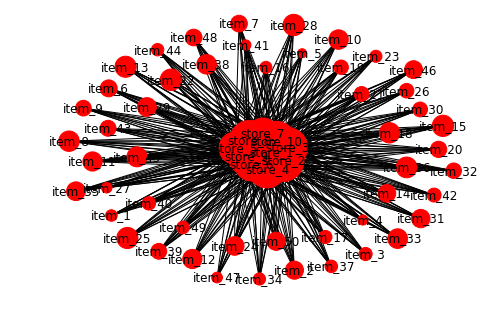

In [127]:
g = nx.from_pandas_edgelist(test, source='store', target='item', edge_attr = 'sales') 
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, pos = pos, node_size = [nodes[nodes['node'] == order]['size'].item() for order in n_list])
